In [1]:
# Импорт библиотек
import pandas as pd
from sklearn.datasets import load_breast_cancer  # датасет
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  # масштабирование
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score  # метрики
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Загрузка датасета Breast Cancer
cancer = load_breast_cancer()
X = cancer.data  # признаки
y = cancer.target  # метка (0: malignant - злокачественная, 1: benign - доброкачественная)
feature_names = cancer.feature_names  # названия признаков
target_names = cancer.target_names  # названия классов (malignant, benign)

# Преобразуем в DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['target_names'] = df['target'].apply(lambda x: target_names[x])  # колонка с именами классов


Инфо:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error   

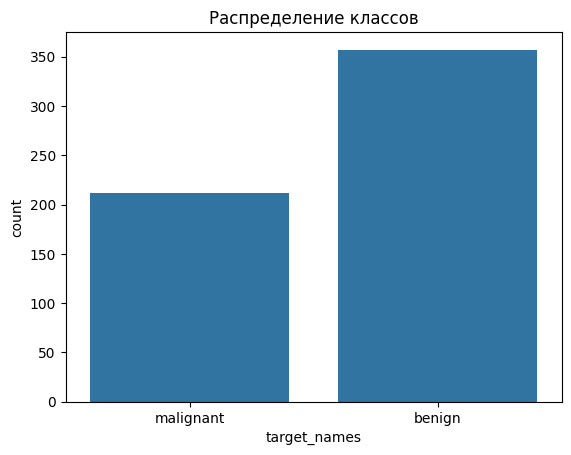

In [3]:
# Посмотрим на данные
print("\nИнфо:")
df.info()

print("\nСтатистика признаков:")
print(df.describe())

# Проверим баланс классов
print("\nРаспределение классов:")
print(df['target_names'].value_counts())
print(df['target_names'].value_counts(normalize=True)) # в долях

# Визуализация распределения классов
sns.countplot(x='target_names', data=df)
plt.title('Распределение классов')
plt.show()

In [4]:
# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
# Добавили stratify=y, чтобы пропорции классов в train и test выборках были примерно одинаковыми

print(f"\nРазмер тренировочной выборки X_train: {X_train.shape}")
print(f"Размер тестовой выборки X_test: {X_test.shape}")
print(f"Распределение классов в y_train:\n{pd.Series(y_train).value_counts(normalize=True)}")
print(f"Распределение классов в y_test:\n{pd.Series(y_test).value_counts(normalize=True)}")


Размер тренировочной выборки X_train: (426, 30)
Размер тестовой выборки X_test: (143, 30)
Распределение классов в y_train:
1    0.626761
0    0.373239
Name: proportion, dtype: float64
Распределение классов в y_test:
1    0.629371
0    0.370629
Name: proportion, dtype: float64


In [5]:
# Масштабирование признаков (рекомендуется для SVM, LogReg, KNN)
scaler = StandardScaler()

# Обучаем scaler ТОЛЬКО на тренировочных данных и трансформируем train и test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Используем X_train_scaled и X_test_scaled для обучения чувствительных к масштабу моделей


In [33]:
# Модель 1: Логистическая Регрессия (чувствительна к масштабу)
model_lr = LogisticRegression(max_iter=200)
model_lr.fit(X_train_scaled, y_train)
y_pred_lr = model_lr.predict(X_test_scaled)

# Модель 2: Дерево Решений (не чувствительно к масштабу)
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

# Модель 3: Случайный Лес (не чувствителен к масштабу)
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

# Модель 4: AdaBoost (не чувствителен к масштабу)
model_ab = AdaBoostClassifier(n_estimators=100, random_state=42)
model_ab.fit(X_train, y_train)
y_pred_ab = model_ab.predict(X_test)

# Модель 5: KNN (чувствительно к масштабу)
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train_scaled, y_train)
y_pred_knn = model_knn.predict(X_test_scaled)

# Модель 6: SVC (чувствительно к масштабу)
# C=1.0 - стандартное значение регуляризации, можно настраивать (например, 0.1, 1, 10, 100)
# gamma='scale' - стандартное значение gamma, тоже можно настраивать ('auto', или числа типа 0.01, 0.1, 1)
# probability=True - нужно, чтобы получить predict_proba и рассчитать AUC-ROC
# kernel='linear' - лучшие результаты, изначально пробовал rbf
model_svc = SVC(kernel='linear', C=1.0, gamma='scale', probability=True, random_state=42)
model_svc.fit(X_train_scaled, y_train)
y_pred_svc = model_svc.predict(X_test_scaled)



--- Результаты для Logistic Regression (Scaled) ---
Accuracy: 0.9860
Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        53
      benign       0.99      0.99      0.99        90

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143

Confusion Matrix:
[[52  1]
 [ 1 89]]


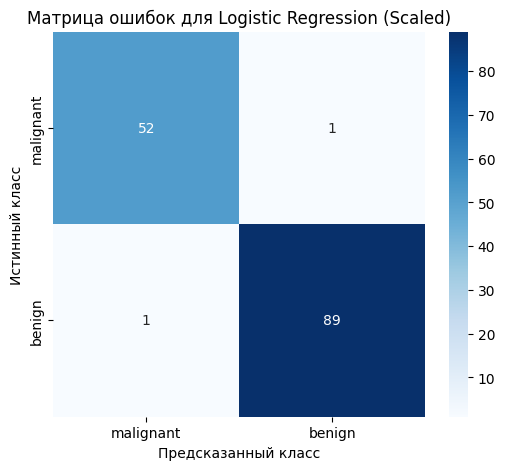

ROC-AUC: 0.9977

--- Результаты для Decision Tree (Original) ---
Accuracy: 0.9231
Classification Report:
              precision    recall  f1-score   support

   malignant       0.88      0.92      0.90        53
      benign       0.95      0.92      0.94        90

    accuracy                           0.92       143
   macro avg       0.91      0.92      0.92       143
weighted avg       0.92      0.92      0.92       143

Confusion Matrix:
[[49  4]
 [ 7 83]]


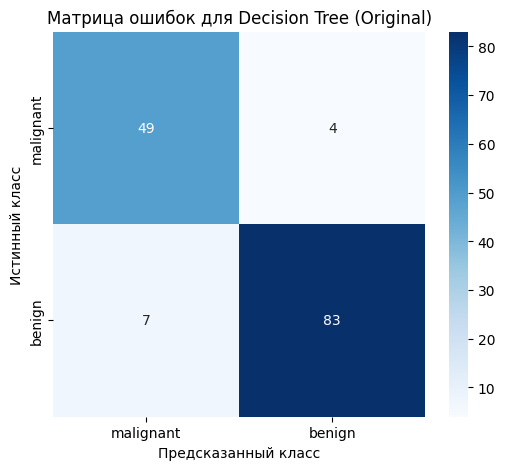

ROC-AUC: 0.9234

--- Результаты для Random Forest (Original) ---
Accuracy: 0.9580
Classification Report:
              precision    recall  f1-score   support

   malignant       0.96      0.92      0.94        53
      benign       0.96      0.98      0.97        90

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143

Confusion Matrix:
[[49  4]
 [ 2 88]]


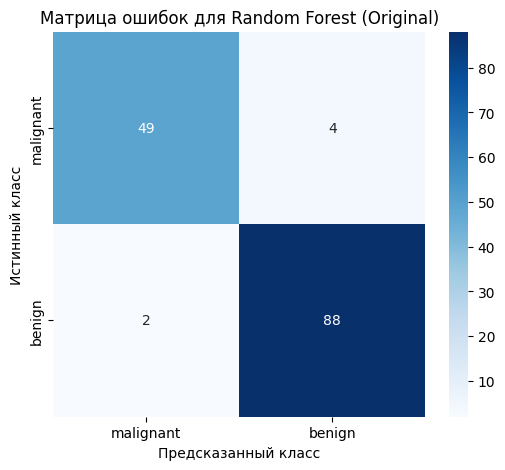

ROC-AUC: 0.9950

--- Результаты для AdaBoost (Original) ---
Accuracy: 0.9650
Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.92      0.95        53
      benign       0.96      0.99      0.97        90

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143

Confusion Matrix:
[[49  4]
 [ 1 89]]


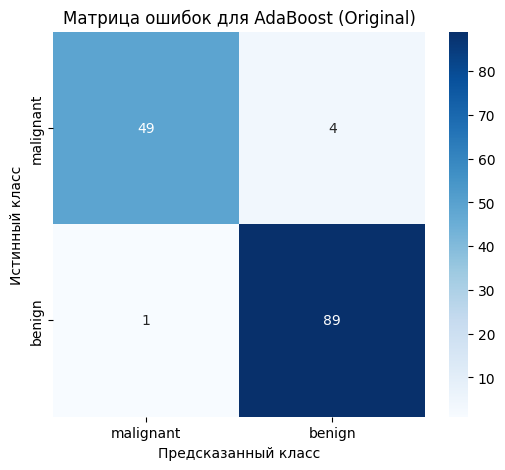

ROC-AUC: 0.9891

--- Результаты для K-Nearest Neighbors (Scaled) ---
Accuracy: 0.9790
Classification Report:
              precision    recall  f1-score   support

   malignant       1.00      0.94      0.97        53
      benign       0.97      1.00      0.98        90

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143

Confusion Matrix:
[[50  3]
 [ 0 90]]


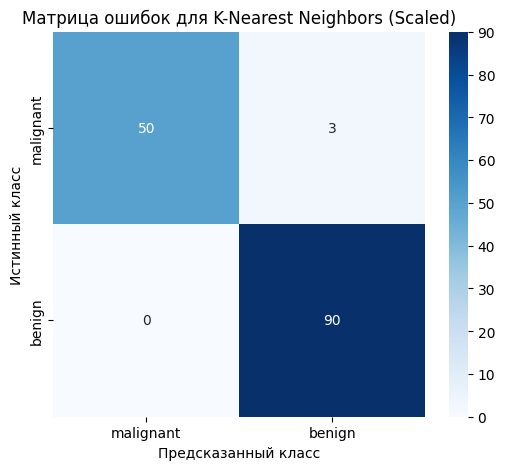

ROC-AUC: 0.9845

--- Результаты для Support Vector Classifier (Scaled) ---
Accuracy: 0.9860
Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        53
      benign       0.99      0.99      0.99        90

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143

Confusion Matrix:
[[52  1]
 [ 1 89]]


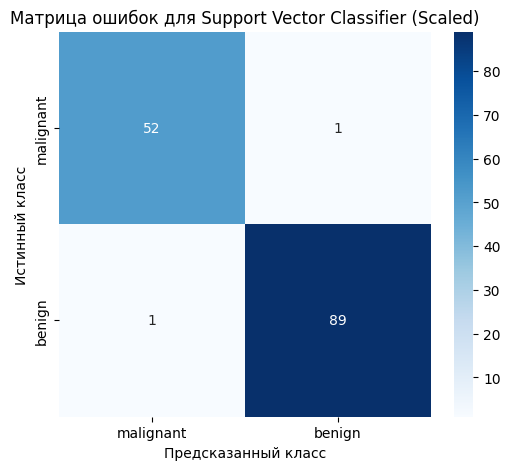

ROC-AUC: 0.9973


In [34]:
# Функция для оценки и вывода метрик
def evaluate_model(ml_model, X_test_data, y_test, y_pred, model_name, target_names):
    print(f"\n--- Результаты для {model_name} ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:")
    # target_names передаем, чтобы видеть malignant/benign вместо 0/1
    print(classification_report(y_test, y_pred, target_names=target_names))

    print("Confusion Matrix:")
    conf_mat = confusion_matrix(y_test, y_pred)
    print(conf_mat)

    # Визуализация Confusion Matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
    plt.xlabel('Предсказанный класс')
    plt.ylabel('Истинный класс')
    plt.title(f'Матрица ошибок для {model_name}')
    plt.show()

    # Проверяем наличие метода predict_proba у переданного объекта модели
    if hasattr(ml_model, 'predict_proba'):
         try:
             # Для predict_proba используем данные X_test_data, которые переданы
             # и соответствуют типу данных, на котором обучалась данная ml_model (масштабированные или нет)
             y_prob = ml_model.predict_proba(X_test_data)[:, 1] # Вероятность положительного класса (1, benign)
             roc_auc = roc_auc_score(y_test, y_prob)
             print(f"ROC-AUC: {roc_auc:.4f}")
         except Exception as e:
             # Обработка возможных ошибок, если predict_proba не работает с данными
             print(f"Не удалось рассчитать ROC-AUC для {model_name}: {e}")
    else:
        print(f"Модель {model_name} не имеет метода predict_proba для расчета ROC-AUC.")

# Оцениваем каждую модель, передавая объект модели и соответствующий X_test (масштабированный или нет)
evaluate_model(model_lr, X_test_scaled, y_test, y_pred_lr, "Logistic Regression (Scaled)", target_names)
evaluate_model(model_dt, X_test, y_test, y_pred_dt, "Decision Tree (Original)", target_names)
evaluate_model(model_rf, X_test, y_test, y_pred_rf, "Random Forest (Original)", target_names)
evaluate_model(model_ab, X_test, y_test, y_pred_ab, "AdaBoost (Original)", target_names)
evaluate_model(model_knn, X_test_scaled, y_test, y_pred_knn, "K-Nearest Neighbors (Scaled)", target_names)
evaluate_model(model_svc, X_test_scaled, y_test, y_pred_svc, "Support Vector Classifier (Scaled)", target_names)